In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(color_codes = True)
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, f_oneway
import statsmodels.api as sm
from statsmodels.stats.power import ttest_power

The above block code is used to import importatnt libraries and assingning variable to to our data frame.

In [3]:
frame = pd.read_csv("C:\\Users\\talk2_000\\Desktop\\Python\\DatasetFiles\\Insurance.csv")

In [3]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Checking for missing values in Object data types other than NaN(This needs to be done since any other string will still be counted as object)

print('Differenty values of categorical data types:')
print('Sex:', frame['sex'].unique())
print('Smoker:', frame['smoker'].unique())
print('region:', frame['region'].unique())

# Checking for missing values in Numerical data types (The above step can be skipped for numerical values since the type is int, float and not object for numerical attributes)


pd.DataFrame(frame.isnull().sum(), columns= ['Number of missing values'])

Differenty values of categorical data types:
Sex: ['female' 'male']
Smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


,Number of missing values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


The above code block is used to check if there are undefined categories in the categorical data, which is not, as well as if there is presence of null values in the columns. Thus, it can be concluded that that there are 2 categories in column "sex" as "female" & "male", "yes" & "no" in column "smoker" & "southwest", "southeast", "northwest" & "northeast" in column named "region. Also, there is no null vaues in columns.

In [4]:
frame_summary = frame.describe(exclude = object)
frame_summary.drop("count", axis = 0, inplace = True)
frame_summary

,age,bmi,children,expenses
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


The above block code explains the summary of each numeric column, "age" lies between 18 to 64. "bmi" is between 16 to 53.10, either there are minimum 0 or maximum of 5 "children" & "expense" can vary vary from 1121.87 to max 63770.43.



 Box plot showing five point summary for age


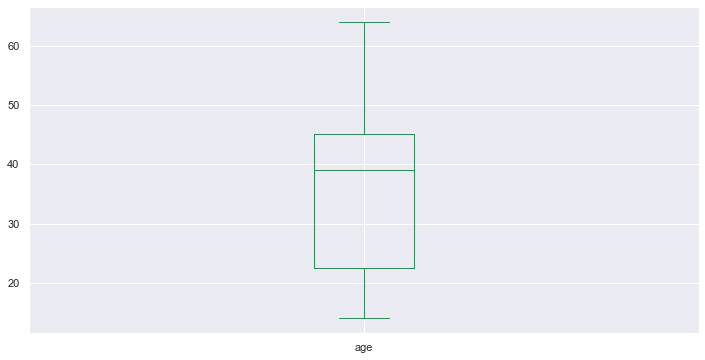



 Box plot showing five point summary for bmi


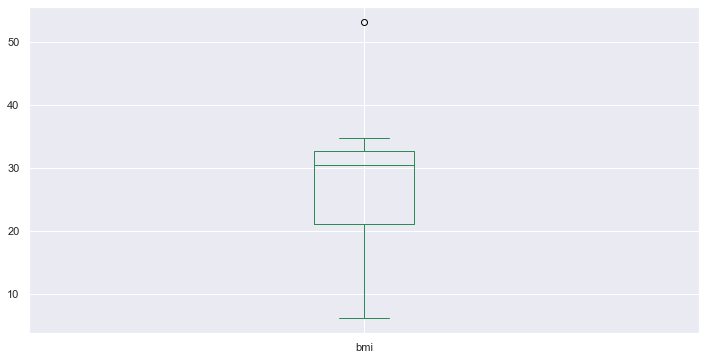



 Box plot showing five point summary for children


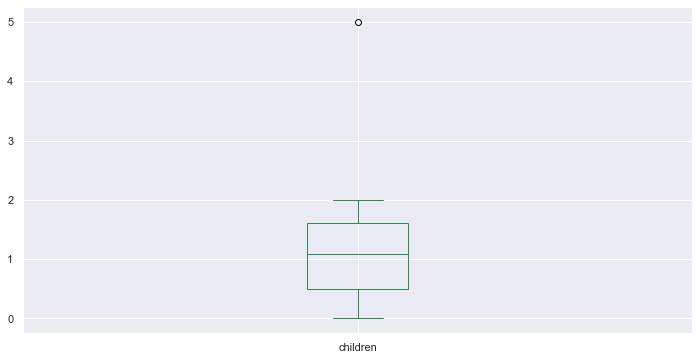



 Box plot showing five point summary for expenses


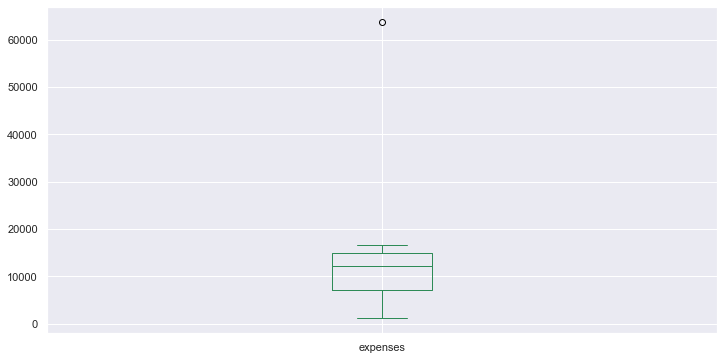

In [5]:
print('\n\n Box plot showing five point summary for age')
frame_summary["age"].plot(kind = 'box', color = "seagreen", figsize=(12, 6))
plt.show()

print('\n\n Box plot showing five point summary for bmi')
frame_summary["bmi"].plot(kind = 'box', color = "seagreen", figsize=(12, 6))
plt.show()

print('\n\n Box plot showing five point summary for children')
frame_summary["children"].plot(kind = 'box', color = "seagreen", figsize=(12, 6))
plt.show()

print('\n\n Box plot showing five point summary for expenses')
frame_summary["expenses"].plot(kind = 'box', color = "seagreen", figsize=(12, 6))
plt.show()

In the above block of code, the data looks like a good distribution:
1) We can see the "age" distribution of insurance is evenly distributed and lies from people of 18 years to people as old as 64 years.
2) The "bmi" attribute is also evenly distributed ranging from 15.9 to 53.13.
3) The "children" attribute is not that evenly distributed, we can see almost 75% people have 2 or less children.
4) The "expenses" attribute is extremely skewed and variable. Since not all people require the same insurance money, some require very less or some require a lot depending on the severity of the disease. So we see a very variable and skewed numbers for charges.

Mean of bmi:  30.665470852017993 
25% value of bmi:  26.3 
Median of bmi:  30.4 
75% value of bmi:  34.7 
Mode of bmi:  27.6 
Max of bmi:  53.1 
Min of bmi:  16.0


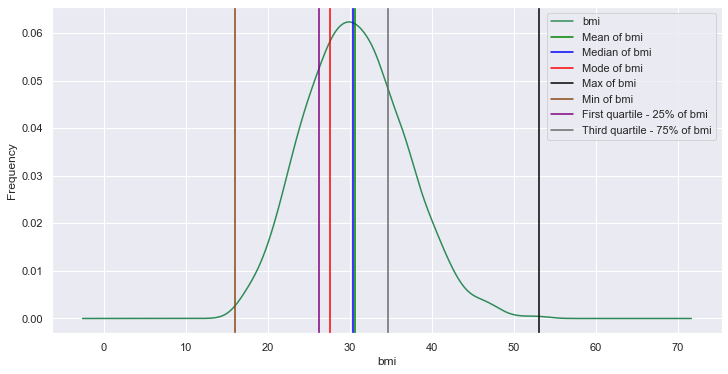

Mean of age:  39.20702541106129 
25% value of age:  27.0 
Median of age:  39.0 
75% value of age:  51.0 
Mode of age:  18 
Max of age:  64 
Min of age:  18


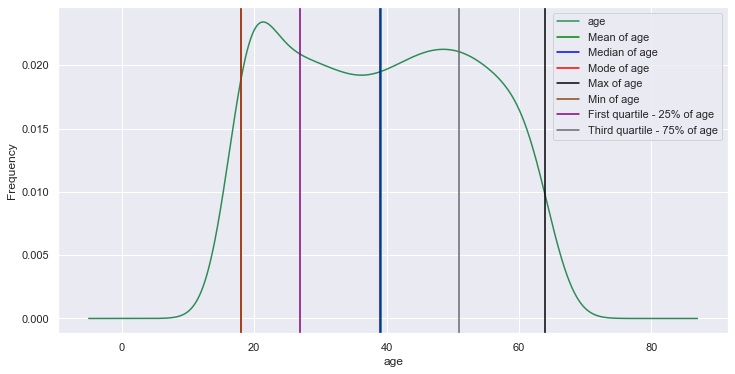

Mean of expenses:  13270.422414050803 
25% value of expenses:  4740.2875 
Median of expenses:  9382.029999999999 
75% value of expenses:  16639.915 
Mode of expenses:  1639.56 
Max of expenses:  63770.43 
Min of expenses:  1121.87


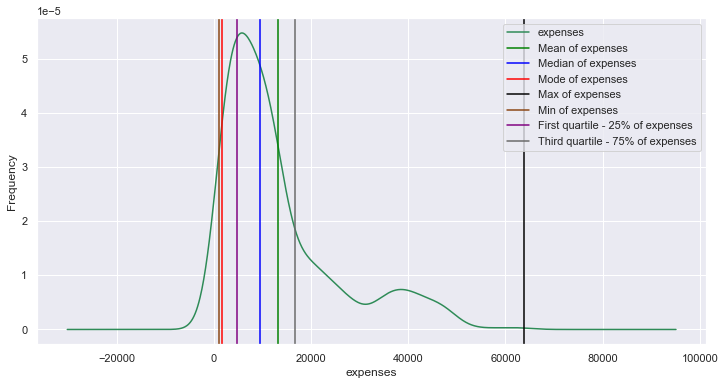

In [6]:
mean_bmi = frame['bmi'].mean()
median_bmi = frame['bmi'].median()
mode_bmi = frame['bmi'].mode()
bmi25 = frame['bmi'].quantile(q = 0.25)
bmi75 = frame['bmi'].quantile(q = 0.75)
max_bmi = frame['bmi'].max()
min_bmi = frame['bmi'].min()

print('Mean of bmi: ', mean_bmi, '\n25% value of bmi: ', bmi25,'\nMedian of bmi: ', median_bmi, '\n75% value of bmi: ',bmi75, '\nMode of bmi: ',mode_bmi[0], '\nMax of bmi: ',max_bmi, '\nMin of bmi: ',min_bmi)

plt.figure(figsize = (12, 6)) 
frame['bmi'].plot(kind = "kde", color = 'seagreen')


plt.axvline(mean_bmi, color = 'green', label = 'Mean of bmi')    
plt.axvline(median_bmi, color = 'blue', label = 'Median of bmi')
plt.axvline(mode_bmi[0], color = 'red', label = 'Mode of bmi')
plt.axvline(max_bmi, color = 'black', label = 'Max of bmi')
plt.axvline(min_bmi, color = 'saddlebrown', label = 'Min of bmi')
plt.axvline(bmi25, color = 'purple', label = 'First quartile - 25% of bmi')
plt.axvline(bmi75, color = 'dimgray', label = 'Third quartile - 75% of bmi')

plt.xlabel('bmi')  
plt.ylabel('Frequency')   
plt.legend()             
plt.show()

mean_age = frame['age'].mean()
median_age = frame['age'].median()
mode_age = frame['age'].mode()
max_age = frame['age'].max()
min_age = frame['age'].min()
age25 = frame['age'].quantile(q=0.25)
age75 = frame['age'].quantile(q=0.75)
print('Mean of age: ', mean_age, '\n25% value of age: ', age25,'\nMedian of age: ', median_age, '\n75% value of age: ',age75,'\nMode of age: ',mode_age[0], '\nMax of age: ',max_age, '\nMin of age: ',min_age)

plt.figure(figsize = (12, 6)) 
frame['age'].plot(kind = "kde", color = 'seagreen')

plt.axvline(mean_age, color = 'green', label = 'Mean of age')    
plt.axvline(median_age, color = 'blue', label = 'Median of age')
plt.axvline(mode_age[0], color = 'red', label = 'Mode of age')
plt.axvline(max_age, color = 'black', label = 'Max of age')
plt.axvline(min_age, color = 'saddlebrown', label = 'Min of age')
plt.axvline(age25, color = 'purple', label = 'First quartile - 25% of age')
plt.axvline(age75, color = 'dimgrey', label = 'Third quartile - 75% of age')


plt.xlabel('age')  
plt.ylabel('Frequency')   
plt.legend()              
plt.show()

mean_expenses = frame['expenses'].mean()
median_expenses = frame['expenses'].median()
mode_expenses = frame['expenses'].mode()
max_expenses = frame['expenses'].max()
min_expenses = frame['expenses'].min()
expenses25 = frame['expenses'].quantile(q = 0.25)
expenses75 = frame['expenses'].quantile(q = 0.75)
print('Mean of expenses: ',mean_expenses,'\n25% value of expenses: ',expenses25,'\nMedian of expenses: ',median_expenses, '\n75% value of expenses: ',expenses75,'\nMode of expenses: ',mode_expenses[0], '\nMax of expenses: ',max_expenses, '\nMin of expenses: ',min_expenses)

plt.figure(figsize = (12, 6)) 
frame['expenses'].plot(kind = "kde", color = 'seagreen')

plt.axvline(mean_expenses, color = 'green', label = 'Mean of expenses')    
plt.axvline(median_expenses, color='blue', label = 'Median of expenses')
plt.axvline(mode_expenses[0], color='red', label = 'Mode of expenses')
plt.axvline(max_expenses, color='black', label = 'Max of expenses')
plt.axvline(min_expenses, color='saddlebrown', label = 'Min of expenses')
plt.axvline(expenses25, color='purple', label = 'First quartile - 25% of expenses')
plt.axvline(expenses75, color='dimgrey', label = 'Third quartile - 75% of expenses')

plt.xlabel('expenses')  
plt.ylabel('Frequency')   
plt.legend()             
plt.show()


In the above block of code, we see the distribution of "bmi", "age" and "expenses" in the form of
1) histogram, along with the probablity density curve as well as mean, mode and the five point summary plotted over it.
2) "bmi" looks quite evenly and normally distributed. The mean, median and mode are almost similar giving us more reason to believe that the distribution is normal.
3) "age" also looks quite uniform and upto some extent, normally distributed. mean and median are same, but mode is likely very small and to the left
4) "expenses" attributes looks highly skewed and not normally distributed. The mean, median, mode are far apart and the data is highly skewed, since insurance charges vary a lot amongst people of different category and needs.

Skewness of bmi is:  0.28459296016731195


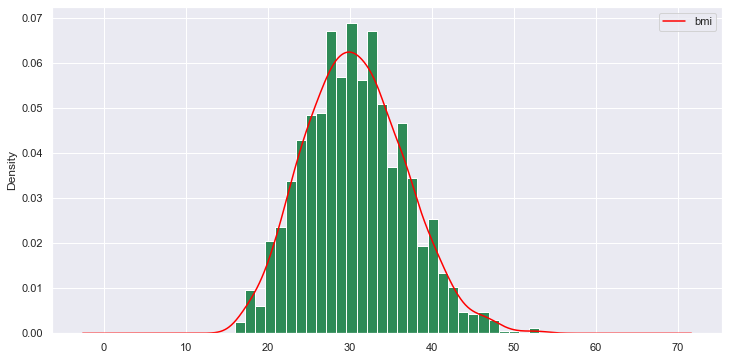

Skewness of age is:  0.05567251565299186


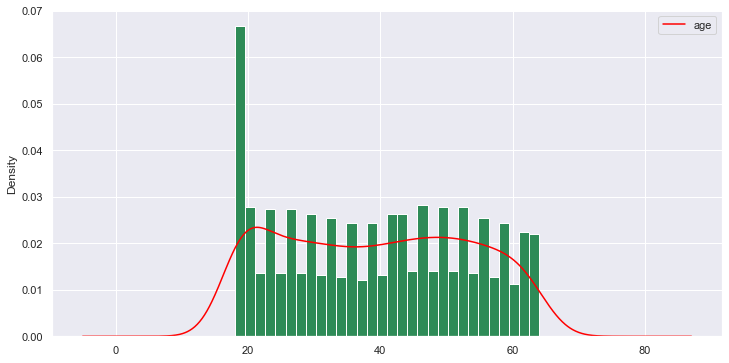

Skewness of charges is:  1.51587966289798


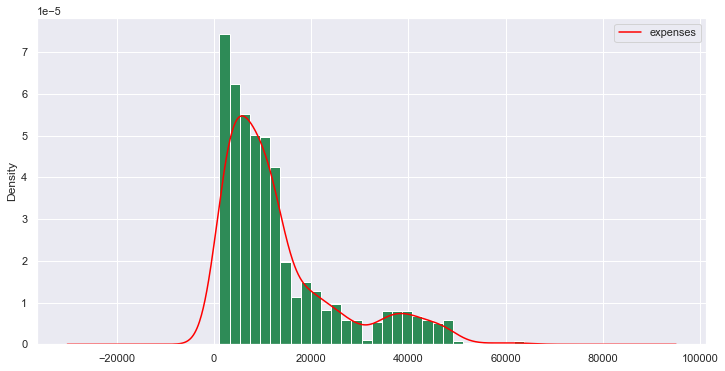

In [7]:
print('Skewness of bmi is: ',frame['bmi'].skew())
plt.figure(figsize = (12, 6))
frame["bmi"].plot(kind = "kde", color = "red")
frame["bmi"].hist(density = True, color = "seagreen", bins = 30)     
plt.legend()
plt.show()


print('Skewness of age is: ',frame['age'].skew())
plt.figure(figsize = (12, 6))
frame["age"].plot(kind = "kde", color = "red")
frame["age"].hist(density = True, color = "seagreen", bins = 30)     
plt.legend()
plt.show()



print('Skewness of charges is: ', frame['expenses'].skew())
plt.figure(figsize = (12, 6))
frame["expenses"].plot(kind = "kde", color = "red")
frame["expenses"].hist(density = True, color = "seagreen", bins = 30)     
plt.legend()
plt.show()

In the above block of code, we the skewness of bmi, age and charges, the orange histogram is the actual distribution of data, the blue curve is what the normal data would look like with the same mean and variance (As skewness gets close to zero, the distribution is considered normal)
1) "bmi" looks very evenly and normally distributed and from the skewness values 0.28 which is very close to 0 it is evidence that the data is normally distributed
2) "age" looks very evenly and normally distributed as well and from the skewness values 0.05 which is very close to 0 it is again evidence that the age data is normally distributed as well
3) The skew value of "expenses" is 1.51 which is very far off from 1 and as it can be seen the charges data is highly skewed and far away from 0, and not a normal distribution,



 Box plot of attribute bmi


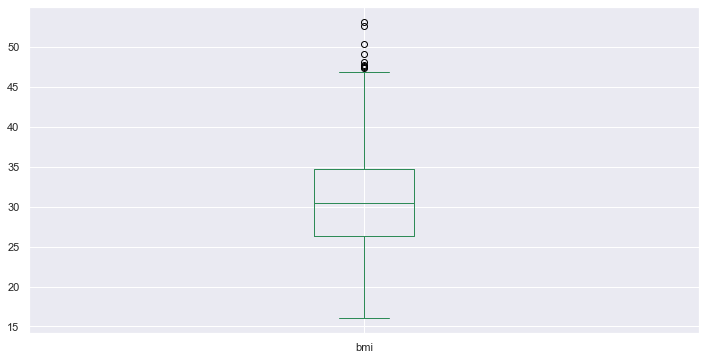

The outlier bmi values are:
Indices   bmi
 116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64


 Box plot of attribute bmi


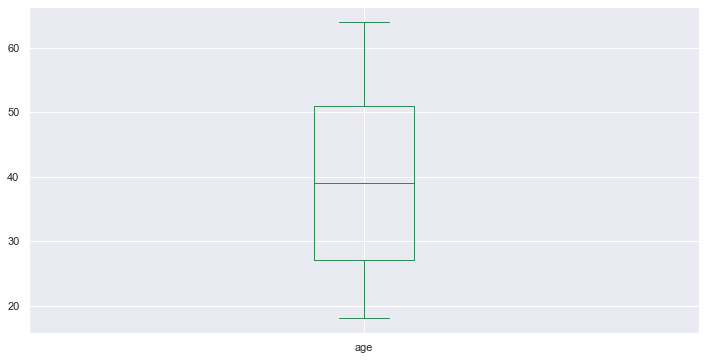

The outlier age values are:
Indices   age
 Series([], Name: age, dtype: int64)


 Box plot of attribute bmi


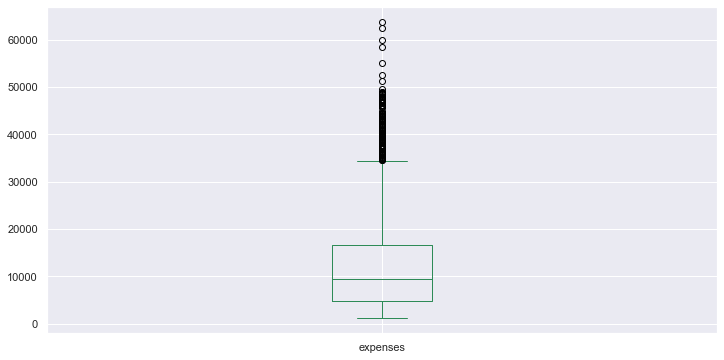

The outlier bmi values are:
Indices   bmi
 14      39611.76
19      36837.47
23      37701.88
29      38711.00
30      35585.58
          ...   
1300    62592.87
1301    46718.16
1303    37829.72
1313    36397.58
1323    43896.38
Name: expenses, Length: 139, dtype: float64


In [8]:
Q1 = frame["bmi"].quantile(0.25)
Q3 = frame["bmi"].quantile(0.75)
IQR = Q3 - Q1
print('\n\n Box plot of attribute bmi')
frame['bmi'].plot(kind = "box", color = "seagreen", figsize=(12, 6))
plt.show()
print('The outlier bmi values are:\nIndices   bmi\n',frame["bmi"][((frame["bmi"] < (Q1 - 1.5 * IQR)) | (frame["bmi"] > (Q3 + 1.5 * IQR)))])


Q1 = frame["age"].quantile(0.25)
Q3 = frame["age"].quantile(0.75)
IQR = Q3 - Q1
print('\n\n Box plot of attribute bmi')
frame['age'].plot(kind = "box", color = "seagreen", figsize=(12, 6))
plt.show()
print('The outlier age values are:\nIndices   age\n',frame["age"][((frame["age"] < (Q1 - 1.5 * IQR)) | (frame["age"] > (Q3 + 1.5 * IQR)))])

Q1 = frame["expenses"].quantile(0.25)
Q3 = frame["expenses"].quantile(0.75)
IQR = Q3 - Q1
print('\n\n Box plot of attribute bmi')
frame['expenses'].plot(kind = "box", color = "seagreen", figsize=(12, 6))
plt.show()
print('The outlier bmi values are:\nIndices   bmi\n',frame["expenses"][((frame["expenses"] < (Q1 - 1.5 * IQR)) | (frame["expenses"] > (Q3 + 1.5 * IQR)))])

In the above block of code, we check for outliers in bmi, age and charges, we use the IQR and box plot concept
1) Although "bmi" is normally distributed, there are a few outliers on the max extreme.
2) "age" is normally distributed, there are no outliers
3) As we have see from our above analysis, "expenses" is extremely skewed and there are a lot of outliers on the max side.

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


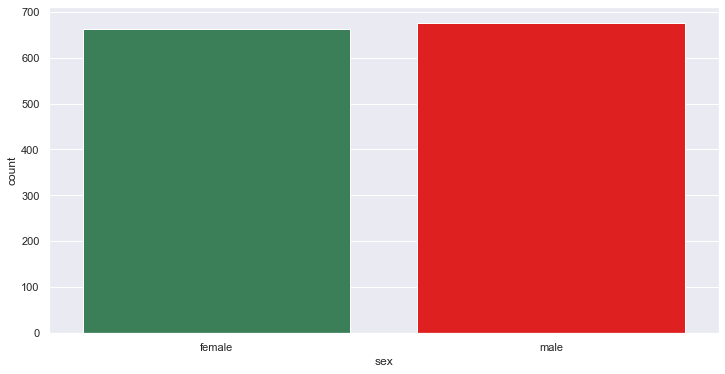

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


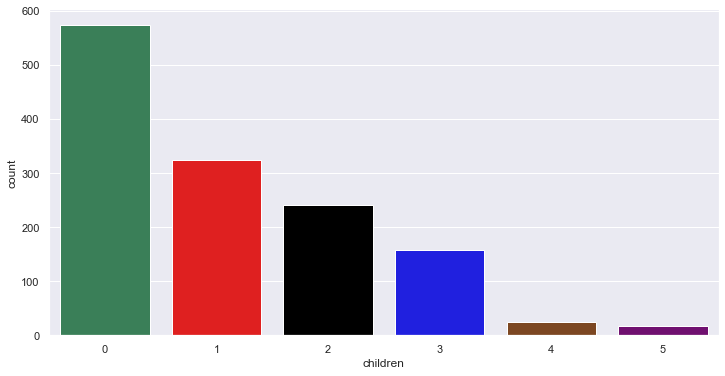

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


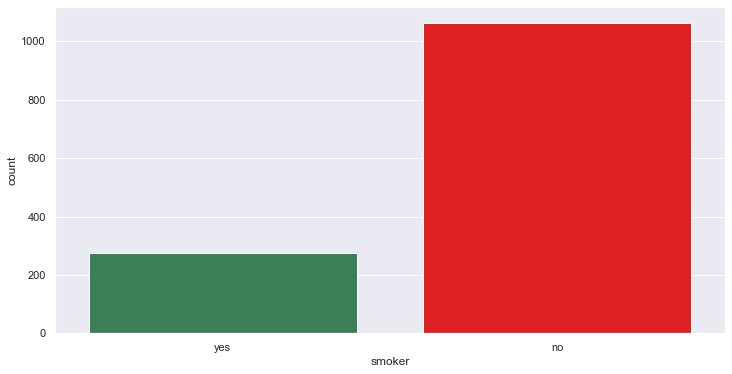

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


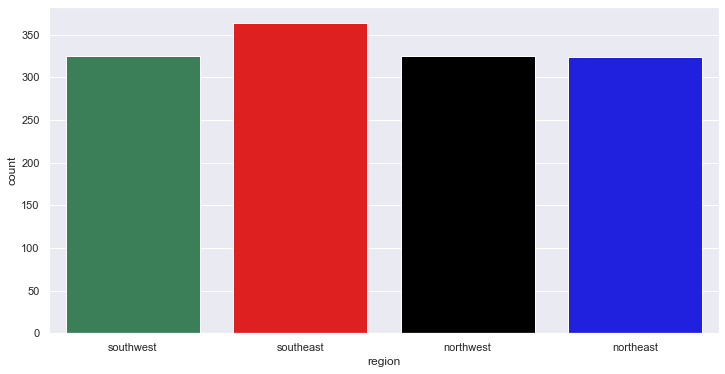

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(frame['sex'], palette = ['seagreen',"red"])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(frame['children'], palette = ["seagreen", "red", "black", "blue", "saddlebrown", "purple"])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(frame['smoker'], palette = ["seagreen", "red"])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(frame['region'], palette = ["seagreen", "red", "black", "blue"])
plt.show()

In the above block of code, we see the distribution of sex, children, smoker and region
1) In the sex attribute we see that males and females are quite equal and comparable
2) In the children attribute we see that most of the people have 0,1,2 children and very less people have 3, 4, 5 children
3) In the smoker attribute we see that majority of the people are non smokers and small amount of people are smokers
4) In the regions attribute, we see there are people almost equally from all regions.

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


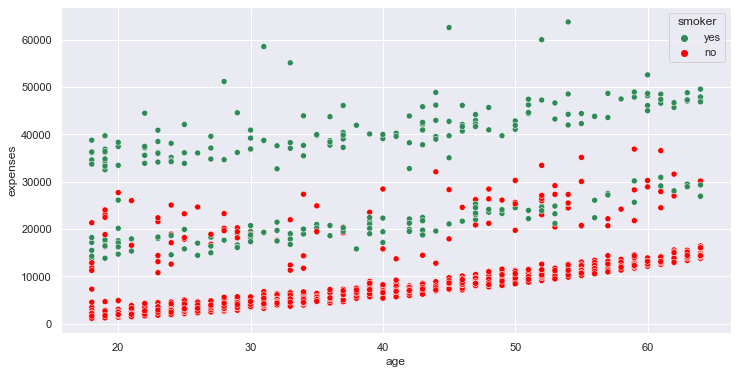

-46.6649210792002 8.271449574495316e-283


The charges for smokers and non smomker are not equal since 8.271449574495316e-283 is smaller than 0.5


In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(frame['age'], frame['expenses'], hue = frame['smoker'], palette = ["seagreen", "red"])
plt.show()

nonsmoker = frame[frame["smoker"] == 'no']
smoker = frame[frame["smoker"] =='yes']

nonsmoker_expenses = nonsmoker['expenses']
smoker_expenses = smoker['expenses']

t,p = ttest_ind(nonsmoker_expenses, smoker_expenses)
print(t,p)

if p < 0.05:  
    print('\n\nThe charges for smokers and non smomker are not equal since', p, 'is smaller than 0.5')
else:
    print('The charges for smokers and non smomker are equal since', p, 'is greater than 0.5')

statistical analysis:

Ho = The charges for smokers and no smokers are equal.

Ha = The charges are not equal.

In the above block of code we see graphical analysis and hypothesis analysis(t test).
From graphical analysis we see that the charges for smoker are obviously higher than that of no smoker. We confirm from hypothesis analysis that the charges for smokers and non smomker are not equal and significantly different.

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


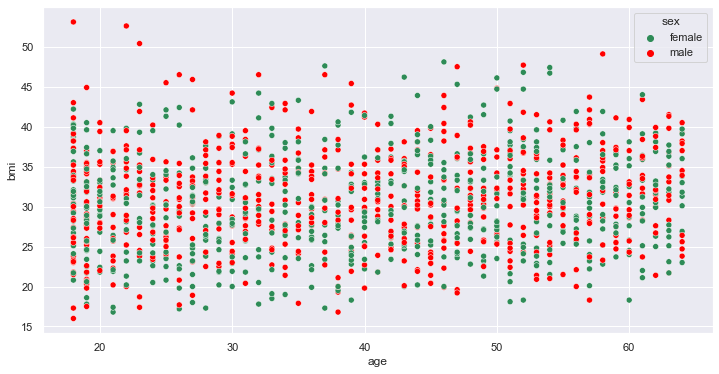

1.6970846764986391 0.08991356987176295
The bmi for males and females are equal since 0.08991356987176295 is greater than 0.5


In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(frame['age'], frame['bmi'], hue = frame['sex'], palette = ["seagreen", "red"])
plt.show()

males = frame[frame['sex'] == 'male']
females = frame[frame['sex'] == 'female']

male_bmi = males['bmi']
female_bmi = females['bmi']

t,p = ttest_ind(male_bmi, female_bmi)
print(t,p)

if p < 0.05:  
    print('The bmi for males and females are not equal since', p, 'is less than 0.5')
else:
    print('The bmi for males and females are equal since', p, 'is greater than 0.5')

Ho = The bmi for males and females are equal

Ha = The bmi are not equal

In the above block of code we see graphical analysis and hypothesis analysis(t test)
From graphical analysis we cannot infer or conclude anything. We confirm from hypothesis analysis that the the bmi for males and females are equal and does not differe significanlty.

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


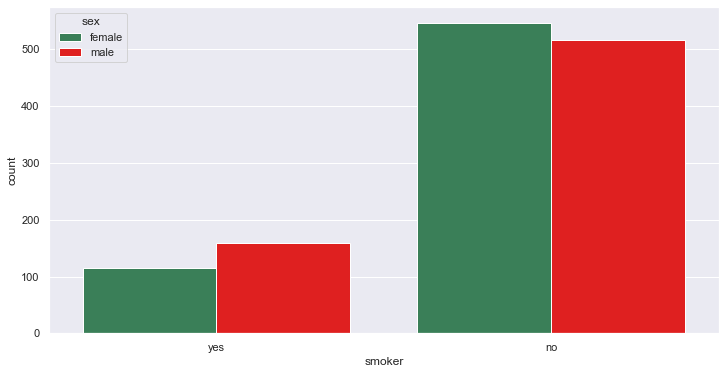

cross tab of sex and smoker

 smoker   no  yes
sex             
female  547  115
male    517  159
 

Proportion of smokers in females, males = 0.17%, 0.24% respectively
-2.7867402154855503 0.005324114164320532

The propotion of smokers in males and females are not equal since 0.005324114164320532 is less than 0.5


In [13]:
plt.figure(figsize = (12, 6))
sns.countplot(frame['smoker'], hue = frame['sex'], palette = ["seagreen", "red"]);
plt.show()

female_smokers = frame[frame['sex'] == 'female'].smoker.value_counts()[1]  
male_smokers = frame[frame['sex'] == 'male'].smoker.value_counts()[1] 
n_females = frame["sex"].value_counts()[1] 
n_males = frame["sex"].value_counts()[0] 

crosstab = pd.crosstab(frame['sex'], frame['smoker']) 
print('cross tab of sex and smoker\n\n',crosstab)
print(f' \n\nProportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

from statsmodels.stats.proportion import proportions_ztest
t, p = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print(t,p)
if p < 0.05:
    print('\nThe propotion of smokers in males and females are not equal since',p, 'is less than 0.5')
else:
    print('\nThe propotion of smokers in males and females are equal since',p, 'is greater than 0.5')

Ho = The proportions of smokeres in males and females are equal

Ha =The proportions of smokeres in males and females are not equal


In the above block of code we see graphical analysis and hypothesis analysis(propotion test)
From graphical analysis we can say that there is difference in propotion of smokers in males and females.We confirm from hypothesis analysis the propotion of smokers in males and females are not equal and differ significantly

C:\Users\talk2_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


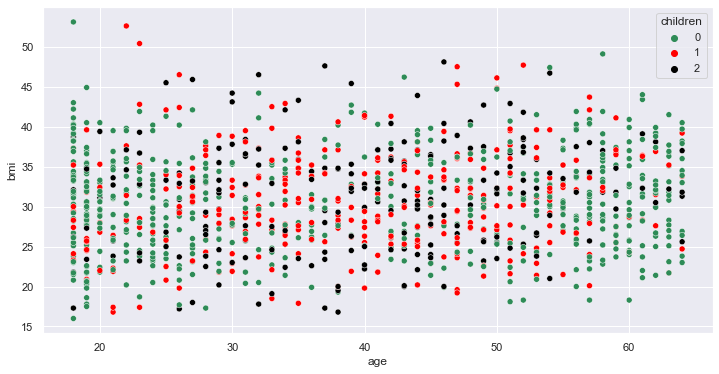

0.01703131784317739 0.9831130892978293
No. of children has no effect on bmi since 0.9831130892978293 is greater than 0.05


In [14]:
newdata = frame[frame['children'] < 3]
plt.figure(figsize = (12, 6))
sns.scatterplot(newdata['age'], newdata['bmi'], hue = newdata['children'], palette = ["seagreen", "red", "black"])
plt.show()



females = frame[frame['sex'] =='female']
zerochild = frame[frame['children'] == 0]['bmi']
onechild = frame[frame['children'] == 1]['bmi']
twochild = frame[frame['children'] == 0]['bmi']

s, p = f_oneway(zerochild, onechild, twochild)
print(s,p)

if p < 0.05:  
    print('No. of children has an effect on bmi since', p, 'is less than 0.05')
else:
    print('No. of children has no effect on bmi since', p, 'is greater than 0.05')


Ho = "No. of children has no effect on bmi"  
Ha = "No. of children has an effect on bmi" 

In the above block of code we see graphical analysis and hypothesis analysis(One way Anova).From graphical analysis we cannot say much We confirm from hypothesis analysis that number of children has no effect on bmi

In [15]:
frame = pd.get_dummies(frame, columns = ["sex", "smoker", "region"], prefix = "", drop_first = True)

The above code is used to give categorical varibales dummies.

In [16]:
x = frame.drop("expenses", axis = 1).assign(const = 1)
y = frame["expenses"]

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:46:29   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8392     11.899     21.586      0.0

Above reslut of OLS.

In [17]:
frame["predictions"] = results.fittedvalues
frame

,age,bmi,children,expenses,_male,_yes,_northwest,_southeast,_southwest,predictions
0,19,27.9,0,16884.92,0,1,0,0,1,25292.739833
1,18,33.8,1,1725.55,1,0,0,1,0,3458.281191
2,28,33.0,3,4449.46,1,0,0,1,0,6706.618837
3,33,22.7,0,21984.47,1,0,1,0,0,3751.867957
4,32,28.9,0,3866.86,1,0,1,0,0,5598.625939
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0,0,12361.306470
1334,18,31.9,0,2205.98,0,0,0,0,0,3504.889250
1335,18,36.9,0,1629.83,0,0,0,1,0,4165.742865
1336,21,25.8,0,2007.95,0,0,0,0,1,1246.432766


In [18]:
frame = frame.drop("predictions", axis = 1)

In [33]:
from sklearn import preprocessing 
frame_z = pd.DataFrame(preprocessing.StandardScaler().fit_transform(frame), columns = frame.columns)

In [34]:
frame_z

,age,bmi,children,expenses,_male,_yes,_northwest,_southeast,_southwest
0,-1.438764,-0.453646,-0.908614,0.298583,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.514186,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.382954,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.306650,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.289606,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.054876,1.580926,-0.220551,0.989591,-0.507463,1.765481,-0.611324,-0.566418
1334,-1.509965,0.202511,-0.908614,-0.914002,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
1335,-1.509965,1.022707,-0.908614,-0.961597,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
1336,-1.296362,-0.798128,-0.908614,-0.930361,-1.010519,-0.507463,-0.566418,-0.611324,1.765481


In [35]:
x = frame_z.drop("expenses", axis = 1).assign(const = 1)
y = frame_z["expenses"]

model_z = sm.OLS(y, x)
results = model_z.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:59:12   Log-Likelihood:                -968.62
No. Observations:                1338   AIC:                             1955.
Df Residuals:                    1329   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.2980      0.014     21.586      0.0

In [36]:
from sklearn import preprocessing 
frame_m = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(frame), columns = frame.columns)

In [37]:
x = frame_m.drop("expenses", axis = 1).assign(const = 1)
y = frame_m["expenses"]

model_m = sm.OLS(y, x)
results = model_m.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:00:49   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1886      0.009     21.586      0.0

In [38]:
coln = frame.columns
for i in range(0, len(xvar)):
    xvar = list(coln)
    yvar = xvar.pop(i)
    mod = sm.OLS(frame[yvar], sm.add_constant(frame[xvar]))
    res = mod.fit()
    vif = 1 /(1 - res.rsquared)
    print(yvar, round(vif, 3))

NameError: name 'xvar' is not defined